# Projet P6 - Analysez les ventes d'une librairie avec R ou Python

*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray - Novembre 2022*
<hr>

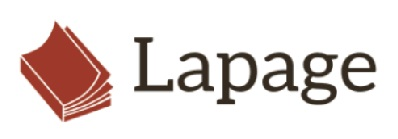

## <font color='blue'>Sommaire</font>

**[Partie 4 - Tests statistiques et analyses](#partie4)**
* [4.1. Lien entre le genre d'un client et les catégories des livres achetés](#4_1)
    * [4.1.1. Réprésentation graphique des catégories de livres achétés en fonction du genre du client](#4_1_1)
    * [4.1.2. Test statistique d'indépendance du $\chi^2$](#4_1_2)
    
    
* [4.2. Lien entre l’âge des clients et le montant total des achats](#4_2)
    * [4.2.1. Représentation graphique](#4_2_1)
    * [4.2.2. Test de normalité de la distribution des variables](#4_2_2)
    * [4.2.3. Test statistique : âge et montant des achats](#4_2_3)
        * [a. Coefficient de corrélation de Pearson](#4_2_3_1)
        * [b. Coefficient de corrélation de rang de Spearman](#4_2_3_2)
    * [4.2.4. Test statistique : classe d'âge et montant des achats](#4_2_4)
         * [a. Test ANOVA paramétrique](#4_2_4_1)
         * [b. Test de Kruskal-Wallis - non paramétrique](#4_2_4_2)
    * [4.2.5. Conclusion](#4_2_5)
    
    
* [4.3. Lien entre l’âge des clients et la fréquence des achats](#4_3)
    * [4.3.1. Représentation graphique](#4_3_1)
    * [4.3.2. Test de normalité de la distribution des variables](#4_3_2)
    * [4.3.3. Test statistique : âge et fréquence des achats](#4_3_3)
        * [a. Coefficient de corrélation de Pearson](#4_3_3_1)
        * [b. Coefficient de corrélation de rang de Spearman](#4_3_3_2)
    * [4.3.4. Test statistique : classe d'âge et fréquence des achats](#4_3_4)
         * [a. Test ANOVA paramétrique](#4_3_4_1)
         * [b. Test de Kruskal-Wallis - non paramétrique](#4_3_4_2)
    * [4.3.5. Conclusion](#4_3_5)
    
    
* [4.4. Lien entre l’âge des clients et la taille du panier moyen](#4_4)
    * [4.4.1. Représentation graphique](#4_4_1)
    * [4.4.2. Test de normalité de la distribution des variables](#4_4_2)
    * [4.4.3. Test statistique : âge et fréquence des achats](#4_4_3)
        * [a. Coefficient de corrélation de Pearson](#4_4_3_1)
        * [b. Coefficient de corrélation de rang de Spearman](#4_4_3_2)
    * [4.4.4. Test statistique : classe d'âge et fréquence des achats](#4_4_4)
         * [a. Test ANOVA paramétrique](#4_4_4_1)
         * [b. Test de Kruskal-Wallis - non paramétrique](#4_4_4_2)
    * [4.4.5. Conclusion](#4_4_5)
    
    
* [4.5. Lien entre l’âge des clients et la catégorie de livres](#4_5)
    * [4.5.1. Représentation graphique](#4_5_1)
    * [4.5.2. Test statistique : âge des clients et catégorie de livres](#4_5_2)
         * [a. Test ANOVA paramétrique](#4_5_2_1)
         * [b. Test de Kruskal-Wallis - non paramétrique](#4_5_2_2)
    * [4.5.3. Test statistique d'indépendance du $\chi^2$ : classe d'âge et catégorie](#4_5_3)     
    * [4.5.4. Conclusion](#4_5_4)
    
    
* [4.6. Observations des corrélations entre les variables quantitatives](#4_6)
    * [4.6.1. Corrélations entre les variables quantitatives](#4_6_1)
    * [4.6.2. Modélisation de la relation 'montant_total_achat' et 'freq_achat'](#4_6_2)
    * [4.6.3. Modélisation de la relation 'age' et 'panier_moyen'](#4_6_3)

### Importation des librairies

In [1]:
# Importation des librairies pandas, numpy, pyplot de matplotlib, seaborn, plotly, datetime, scipy stats
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as gp
import datetime as dt
import scipy.stats as st

In [4]:
# Importation des librairies resarchpy et pingouin
import researchpy as rp
import pingouin as pg

C:\Users\Adeline\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Importation du fichier de données

In [5]:
# Importation du data frame df_global
df_global=pd.read_csv('df_global.csv',index_col=0)
df_client=pd.read_csv('df_client.csv',index_col=0)

In [6]:
#Conversion en format date et remplacement des erreurs par 'NaT'
df_global['date']=pd.to_datetime(df_global['date'],errors='coerce')

## <font color='blue'>Partie 4 - Tests statistiques et analyses<a class="anchor" id="partie4"></a>

La partie 4 présente les résultats des tests statistiques et analyses suivants : 
- Lien entre le genre d’un client et les catégories des livres achetés
- Lien entre l’âge des clients et le montant total des achats
- Lien entre l’âge des clients et la fréquence d’achat
- Lien entre l’âge des clients et la taille du panier moyen
- Lien entre l’âge des clients et les catégories des livres achetés

Sont exclus de l'analyse :
- Les clients B2B : leur habitudes d'achats ne sont pas liées à leur genre ou âge : ils achètent pour d'autres.
- Les clients qui n'ont réalisé aucun achat sur la boutique en ligne.


Les analyses seront réalisées sur les clients de profil Business to Customer, plus représentatifs.

In [7]:
df_B2C=df_global.loc[df_global['profil_client']=='B2C']

In [8]:
df_client_B2C=df_client.loc[df_client['profil_client']=='B2C']

### 4.1. Lien entre le genre d'un client et les catégories des livres achetés<a class="anchor" id="4_1"></a>

Le genre du client et les catégories de livres sont des variables qualitatives.

#### 4.1.1. Réprésentation graphique<a class="anchor" id="4_1_1"></a></font>

La répartition des achats de livres par catégorie pour chaque genre est similaire.


Les femmes achètent plus de livres au global que les hommes.

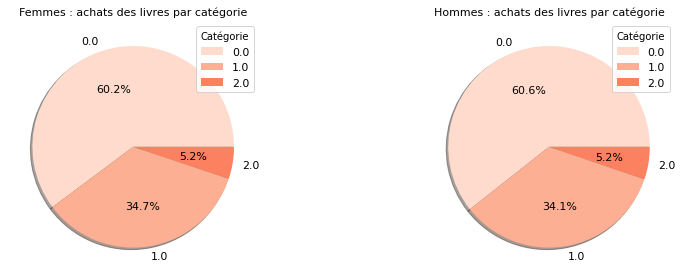

In [9]:
# création de la fenêtre graphique 1
plt.figure(1,figsize=(7,5))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)

colors = sns.color_palette("Reds")
# division de la fenêtre graphique en 1 ligne, 2 colonnes,
# graphique en position 1
# puis caractéristiques de ce graphique
plt.subplot(1,2,1)

data_f = df_B2C.loc[df_B2C['sex']=='f'].groupby(['sex','categ'])['date'].count().reset_index()

plt.pie(x=data_f['date'],labels=data_f['categ'],colors = colors,autopct='%.1f%%',
        textprops={'fontsize': 11}, shadow=True)
plt.title("Femmes : achats des livres par catégorie",fontsize=11)
plt.legend(title='Catégorie', fontsize=11,loc="upper right")

# graphique en position 2
# puis caractéristiques de ce graphique
plt.subplot(1,2,2)

data_m = df_B2C.loc[df_B2C['sex']=='m'].groupby(['sex','categ'])['date'].count().reset_index()

plt.pie(x=data_m['date'],labels=data_m['categ'],colors = colors,autopct='%.1f%%',
        textprops={'fontsize': 11}, shadow=True)

plt.title("Hommes : achats des livres par catégorie",fontsize=11)
plt.legend(title='Catégorie', fontsize=11, loc="upper right")
plt.show()

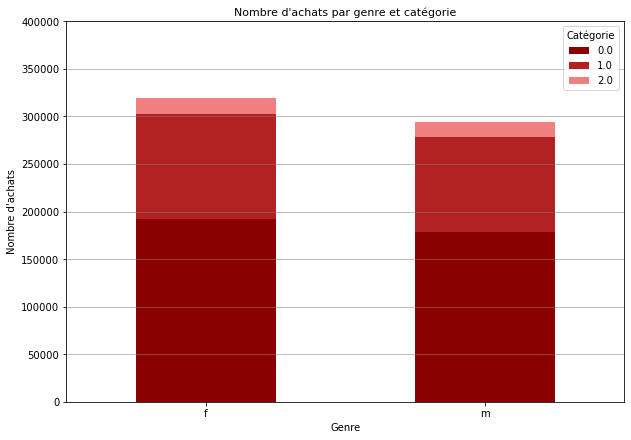

In [10]:
# Réprésentation du volume d'achat par genre et catégorie, diagramme à barres empilées
df_B2C.pivot_table(index='sex', columns='categ',values='date', aggfunc='count')\
         .plot.bar(stacked=True,color=['darkred', 'firebrick', 'lightcoral'],rot=0, figsize=(10,7))
plt.xlabel("Genre")
plt.ylabel("Nombre d'achats")
plt.ylim([0,400000])
plt.grid(color='gray', linestyle='-', linewidth=0.5, axis='y')
plt.legend(title='Catégorie',loc='upper right')
plt.title("Nombre d'achats par genre et catégorie",fontsize=11)
plt.show()

#### 4.1.2. Test statistique d'indépendance du $\chi^2$<a class="anchor" id="4_1_2"></a>

- **Hypothèses de test**: 
    - H0 : La catégorie de livres achetés est indépendante du genre du client.
    - H1 : La catégorie de livres achetés est dépendante du genre du client.
- **Type de variables** : Les variables genre et catégorie sont des variables qualitatives.
- **Risque d'erreur de première espèce $\alpha$** : 5%, soit 0.05
- **Choix du test statistique** : Test d'indépendance du chi-2
    - Les conditions pour appliquer un test du chi-2 sont :
        - 2 variables qualitatives, collectées de manière indépendantes
        - aucune valeur attendue n'est égale à 0
        - pour 80% des combinaisons des 2 variables, les valeurs observées et attendues sont supérieures à 5.

##### Tableau des contingences

Pour représenter le genre du client en fonction de la catégorie de livres achetés, 2 variables qualitatives, une matrice des valeurs observées, tableau des contingences, est la plus adaptée.

In [11]:
# Tableau des contingences
X = "categ"
Y = "sex"

cont = df_B2C[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0.0,192025,178044,370069
1.0,110550,100227,210777
2.0,16429,15351,31780
Total,319004,293622,612626


##### Heatmap de la matrice des écarts au carré normalisés

Pour chaque catégorie, les femmes achètent un peu plus de livres que les hommes.

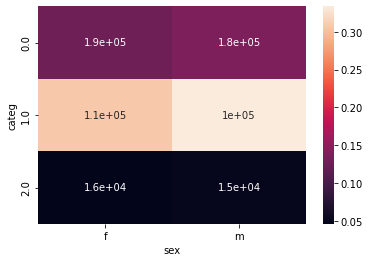

In [12]:
# Calcul des écarts au carré normalisés
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_B2C)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

# Affichage des résultats sous forme de heatmap
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

##### Test du $\chi^2$ d'indépendance

Vérifications des conditions d'application du test du $\chi^2$ d'indépendance:
- Les variables ont été collectées de manière indépendantes (2 sources différentes)
- Aucune valeur attendue = 0
- Les valeurs observées et attendues sont supérieures à 5 

(voir valeurs attendues ci-dessous)

In [13]:
X = "categ"
Y = "sex"

cont = df_B2C[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

In [14]:
# Chi-2 et pvalue avec Scipy.stats
chi2, pvalue, dof, expected = st.chi2_contingency(cont)

In [15]:
# Valeurs attendues
print("Les valeurs attendues sont :\n",expected)

Les valeurs attendues sont :
 [[192700.75262232 177368.24737768]
 [109754.90120889 101022.09879111]
 [ 16548.34616879  15231.65383121]]


Pour un niveau de confiance de 95%, la région critique conduisant au rejet de H0 pour une loi du $\chi^2$ à 2 degrés de liberté, la région critique conduisant au rejet de l'hypothèse H0 est de [5.991; +$\infty$[.

Avec $\chi^2$ = 18,75 et pour un niveau de test de 5%, nous sommes dans la région à risques, l'hypothèse H0 est rejettée : les variables genre et catégorie de livres ne sont pas indépendantes.

La p-value < 0.05 confirme également le rejet de l'hypothèse H0.

In [16]:
# Résultats du test du Chi-2
print("Le degré de liberté est de",dof)
print("Chi-2 =",chi2)
print("p-value =",pvalue)

Le degré de liberté est de 2
Chi-2 = 18.75788251563821
p-value = 8.448460261159054e-05


V de Cramer = 0.0055, soit très proche de 0 : le lien entre les variables genre et catégorie de livres n'est pas significatif.

In [17]:
# test du chi-2 et V de Cramer avec researchpy 
crosstab, test_results, expected = rp.crosstab(df_B2C["categ"], df_B2C["sex"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

# Résultats : Chi-2, p-value et V de Cramer
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,18.7579
1,p-value =,0.0001
2,Cramer's V =,0.0055


### 4.2. Lien entre l’âge des clients et le montant total des achats<a class="anchor" id="4_2"></a>

#### 4.2.1. Représentation graphique<a class="anchor" id="4_2_1"></a>

Il n'y a pas de relation linéaire entre l'âge du client et le montant total des achats.

Boxplots - Les classes d'âge peuvent être regroupées en 3 ensembles différents: 
- la tranche d'âge -30
- la tranche d'âge 30-50 
- la tranche d'âge 50+

Nous pouvons supposer que l'âge a une influence sur le montant total des achats.

##### Nuage de points : montant total des achats en fonction de l'âge du client, visualisation des classes d'âges 

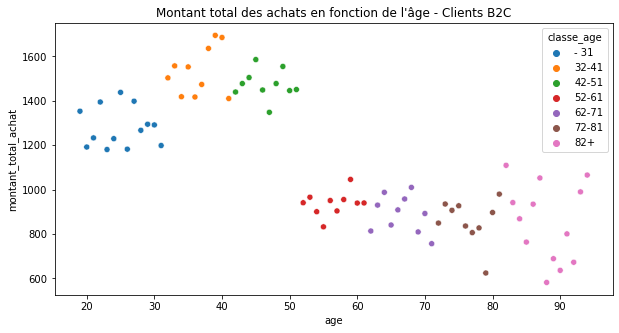

In [18]:
# Graphique : nuage de points, Echantillon du dataset pour alléger le traitement du graphique
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_client_B2C.groupby(['age','classe_age'])['montant_total_achat'].mean().reset_index()\
                .sort_values('classe_age'),x='age', y='montant_total_achat', hue='classe_age')
plt.title("Montant total des achats en fonction de l'âge - Clients B2C")
plt.show()

##### Dispersion du montant total des achats par classe d'âge : boxplots

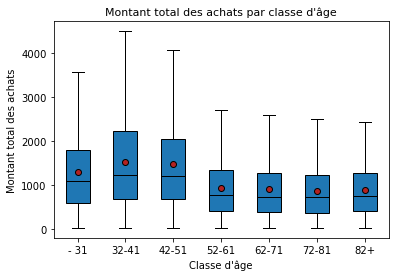

In [19]:
X = "classe_age" # quantitative discrétisée
Y = "montant_total_achat" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Montant total des achats')
plt.xlabel("Classe d'âge")
plt.title("Montant total des achats par classe d'âge",fontsize=11)
plt.show()

#### 4.2.2. Test de normalité de la distribution des variables<a class="anchor" id="4_2_2"></a>

Pour déterminer le test statistique à réaliser, nous allons d'abord tester la normalité de la distribution des variables pour définir s'il faut utiliser un test paramètrique ou non-paramétrique.

##### Variable 'montant_total_achat'
- Observation de la distribution : la distribution du montant total des achats ne suit pas une loi normale.

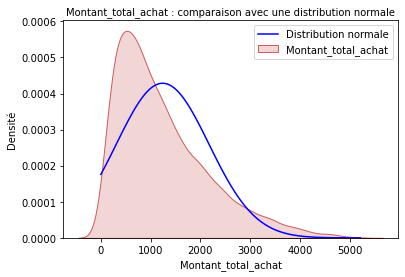

In [20]:
# Distribution normale et distribution du montant total des achats
X=df_client_B2C.montant_total_achat

x_min = 0.0
x_max = max(X)

mean = X.mean()
std = X.std()

x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)

plt.plot(x,y, color='blue',label='Distribution normale')

plt.title('Montant_total_achat : comparaison avec une distribution normale',fontsize=10)

plt.xlabel('Montant_total_achat')
plt.ylabel('Densité')

sns.kdeplot(X, color='indianred',fill=True,label='Montant_total_achat')
plt.legend()
plt.show()

- Tests de normalité :


Le dataset est trop grand pour le test de Shapiro-Wilk : pour nous assurer du résultat du test, nous effectuons également un test K squared D'Agostino.

Les tests confirment que la distribution de la variable 'montant_total_achat' ne suit pas une loi normale.

In [21]:
# Test de Shapiro - Wilk
stat,p = st.shapiro(df_client_B2C["montant_total_achat"])
print('stat = %.3f , p=%.3f \n'% (stat,p))
alpha = 0.05

if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

stat = 0.904 , p=0.000 

H0 peut être rejettée : la distribution ne suit pas la loi normale.


C:\Users\Adeline\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
# Test K squared D'Agostino
k2, p = st.normaltest(df_client_B2C["montant_total_achat"])
alpha = 0.05
print("p = ",p)

if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

p =  0.0
H0 peut être rejettée : la distribution ne suit pas la loi normale.


##### Variable 'age'
- Observation de la distribution : la distribution de l'âge des clients ne suit pas une loi normale.

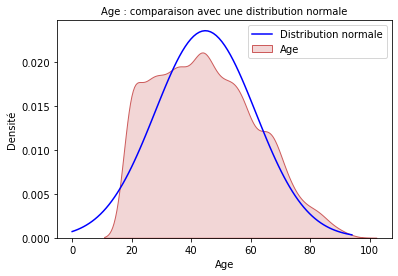

In [23]:
# Distribution normale et distribution de l'âge des clients
X=df_client_B2C.age

x_min = 0.0
x_max = max(X)

mean = X.mean()
std = X.std()

x = np.linspace(x_min, x_max, 100)

y = st.norm.pdf(x,mean,std)

plt.plot(x,y, color='blue',label='Distribution normale')

plt.title('Age : comparaison avec une distribution normale',fontsize=10)

plt.xlabel('Age')
plt.ylabel('Densité')

sns.kdeplot(X, color='indianred',fill=True,label='Age')
plt.legend()
plt.show()

- Tests de normalité :


Le dataset est trop grand pour le test de Shapiro-Wilk : pour nous assurer du résultat du test, nous effectuons également un test K squared D'Agostino.

Les tests confirment que la distribution de la variable 'age' ne suit pas une loi normale.

In [24]:
# Test de Shapiro - Wilk
stat,p = st.shapiro(df_client_B2C["age"])
print('stat = %.3f , p=%.3f \n'% (stat,p))

alpha = 0.05
if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

stat = 0.970 , p=0.000 

H0 peut être rejettée : la distribution ne suit pas la loi normale.


C:\Users\Adeline\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
# Test K squared D'Agostino
k2, p = st.normaltest(df_client_B2C["age"])
alpha = 0.05
print("p = ",p)

if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

p =  3.118429049400099e-110
H0 peut être rejettée : la distribution ne suit pas la loi normale.


#### 4.2.3. Test statistique : âge et montant des achats<a class="anchor" id="4_2_3"></a>

- **Hypothèses de test**: 
    - H0 : Il n'y a pas de corrélation linéaire entre âge et montant total des achats
    - H1 : Il y a de corrélation linéaire entre âge et montant total des achats 
- **Type de variables** : Les variables âge et montant_total_achat sont des variables quantitatives.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : Pour tester une relation monotone, les tests 
    - Test paramétrique : Coefficient de corrélation de Pearson
        - Conditions d'application du test : Distribution normale des variables
    - Test non paramétrique : Coefficient de corrélation de rang de Spearman 

In [ ]:
# Taille de l'échantillon 
df_client_B2C["montant_total_achat"].shape

(8594,)

Cependant :
Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Notre échantillon est supérieur à 30 : nous pouvons également calculer le coefficient de corrélation de Pearson et comparer le résultat au coefficient de corrélation de rang de Spearman.

##### a. Coefficient de corrélation de Pearson<a class="anchor" id="4_2_3_1"></a>

Le coefficient de corrélation de Pearson est de -0.18 : il n'y a pas de relation linéaire significative entre les variables 'age' et 'montant_total_achat'.

In [ ]:
# Calcul du coefficient de Pearson et de la p-value
coeff, pvalue=st.pearsonr(df_client_B2C["age"],df_client_B2C["montant_total_achat"])

print("Le coefficient de corrélation de Pearson est égal à :",round(coeff,2))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejettée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de Pearson est égal à : -0.18
p-value =  3.118429049400099e-110
H0 est rejettée : il existe une corrélation entre les 2 variables.


##### b. Coefficient de corrélation de rang de Spearman<a class="anchor" id="4_2_3_2"></a>

Le coefficient de corrélation de rang de Spearman est de -0.18 : il n'y a pas de relation monotone significative entre les variables 'age' et 'montant_total_achat'.

In [ ]:
# Calcul du coefficient de corrélation de rang de Spearman
coeff, pvalue = st.spearmanr(df_client_B2C["age"],df_client_B2C["montant_total_achat"])
print("Le coefficient de corrélation de rang de Spearman est égal à :",round(coeff,2))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejetée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de rang de Spearman est égal à : -0.18
p-value =  3.118429049400099e-110
H0 est rejetée : il existe une corrélation entre les 2 variables.


##### Essai avec une transformation de la variable montant_total_achat

Pour normaliser la variable montant_total_achat, nous pouvons lui appliquer une transformation. Ici, la transformation racine carrée a été testée : la distribution est plus proche d'une distribution normale après transformation.


Le coefficient de Pearson reste lui inchangé.

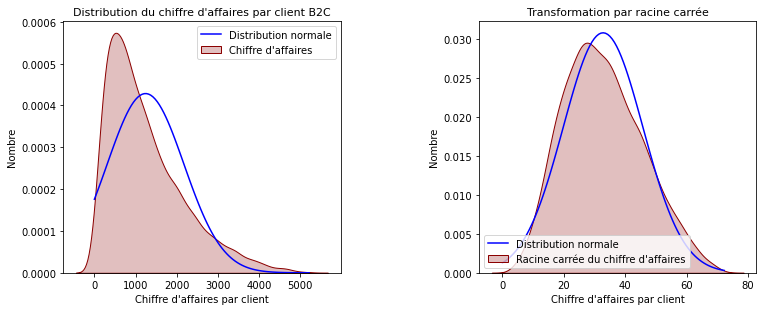

In [ ]:
# création de la fenêtre graphique 1
plt.figure(1,figsize=(7,5))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)


# division de la fenêtre graphique en 1 ligne, 2 colonnes,
# graphique en position 1
# puis caractéristiques de ce graphique
plt.subplot(1,2,1)

# Courbe loi normale
X=df_client_B2C["montant_total_achat"]
x_min = 0.0
x_max = max(X)
mean = X.mean()
std = X.std()
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)
plt.plot(x,y, color='blue',label='Distribution normale')

# Distribution du chiffre d'affaires par client B2C
sns.kdeplot(data=df_client_B2C,x='montant_total_achat',color='darkred', label="Chiffre d'affaires",fill=True)
plt.xlabel("Chiffre d'affaires par client")
plt.ylabel("Nombre")
plt.title("Distribution du chiffre d'affaires par client B2C",fontsize=11)
plt.legend(loc='upper right')

# graphique en position 2
# puis caractéristiques de ce graphique
plt.subplot(1,2,2)

# Courbe loi normale
X=np.sqrt(df_client_B2C["montant_total_achat"])
x_min = 0.0
x_max = max(X)
mean = X.mean()
std = X.std()
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)
plt.plot(x,y, color='blue',label='Distribution normale')

# Distribution du chiffre d'affaires par client B2C : Transformation par racine carrée
sns.kdeplot(data=df_client_B2C,x=X,color='darkred',label="Racine carrée du chiffre d'affaires",fill=True)
plt.xlabel("Chiffre d'affaires par client")
plt.ylabel("Nombre")
plt.title("Transformation par racine carrée",fontsize=11)
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Calcul du coefficient de Pearson et de la p-value
coeff, pvalue=st.pearsonr(df_client_B2C["age"],np.sqrt(df_client_B2C["montant_total_achat"]))

print("Le coefficient de corrélation de Pearson est égal à :",round(coeff,3))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejettée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de Pearson est égal à : -0.187
p-value =  3.118429049400099e-110
H0 est rejettée : il existe une corrélation entre les 2 variables.


#### 4.2.4. Test statistique : groupe d'âge et montant des achats<a class="anchor" id="4_2_4"></a>

- **Hypothèses de test**: 
    - H0 : les moyennes des groupes d'âge sont égales
    - H1 : les moyennes des âges ne sont pas égales
- **Type de variables** : La variable groupe_age est une variable qualitative et le montant_total_achat est une variable quantitative.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : 
    - Test paramétrique : analyse de la dépendance de la variable quantitative 'montant_total_achat' au facteur qualitatif 'classe_age', cas d'une ANOVA à un facteur (analyse bivariée).
        - ANOVA classic - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment
            - Egalité des variances des groupes
        - Welch's ANOVA - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment        
    - Test non paramétrique : Kruskal-Wallis
         - Conditions d'application du test : Variables collectées indépendamment


##### Dispersion du montant total des achats par groupe d'âge : boxplots

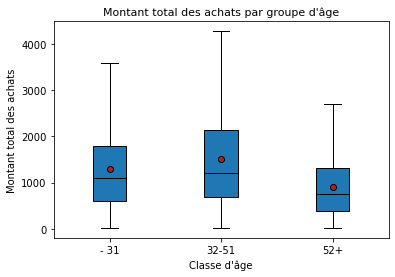

In [31]:
X = "groupe_age" # quantitative discrétisée
Y = "montant_total_achat" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Montant total des achats')
plt.xlabel("Classe d'âge")
plt.title("Montant total des achats par groupe d'âge",fontsize=11)
plt.show()

##### a. Test ANOVA paramétrique<a class="anchor" id="4_2_4_1"></a></font>
Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Dans notre cas, n > 30, le test ANOVA paramétrique est applicable.

##### Test d'égalité des variances

Choix du test ANOVA : tester l'égalité des variances des groupes

=> Les variances ne sont pas égales, nous appliquerons un test Welch-ANOVA.

In [32]:
# Test de l'égalité des variances pour définir quel test d'ANOVA appliqué
pg.homoscedasticity(data=df_client_B2C, dv='montant_total_achat', group='groupe_age')

,W,pval,equal_var
levene,200.932818,5.193821e-86,False


##### Test Welch-ANOVA

La p-value est très inférieure à 0.05 : les moyennes des groupes ne sont pas égales.

In [33]:
# test Welch-ANOVA
pg.welch_anova(data=df_client_B2C, dv='montant_total_achat', between='groupe_age')

,Source,ddof1,ddof2,F,p-unc,np2
0,groupe_age,2,5211.617057,404.751099,4.013047e-164,0.074563


##### Test post-hoc Games-Howell
Pour aller plus loin, un test par paires de Games-Howell peut être réaliser pour comparer les moyennes paire par paire.

=> les moyennes des 3 groupes sont bien différentes.

In [34]:
# Test par paires de Games-Howell
pg.pairwise_gameshowell(data=df_client_B2C, dv='montant_total_achat', between='groupe_age')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,- 31,32-51,1288.824766,1502.318850,-213.494083,26.329519,-8.108545,5287.957012,0.000000e+00,-0.220334
1,- 31,52+,1288.824766,912.215877,376.608889,22.670655,16.612175,3981.013121,2.285727e-12,0.463496
2,32-51,52+,1502.318850,912.215877,590.102972,21.835516,27.024915,5760.162732,3.170797e-12,0.680736


##### b. Test de Kruskal-Wallis - non paramétrique<a class="anchor" id="4_2_4_2"></a></font>

Le test de Kruskal-Wallis confirme qu'il existe une relation entre groupe_age et montant_total_achat. (p-value << 0.05)

In [35]:
# Test de Kruskal-Wallis entre les variables âge et montant total achat
pg.kruskal(data=df_client_B2C, dv='montant_total_achat', between='groupe_age')

,Source,ddof1,H,p-unc
Kruskal,groupe_age,2,580.609019,8.362832e-127


#### 4.2.5. Conclusion<a class="anchor" id="4_2_5">

- Corrélation :
    - Coefficient de Spearman = -0.18 : les variables ne sont pas indépendantes mais la relation monotone n'est pas significative.
    - Coefficient de Pearson = -0.18 : idem résultat précédent. 
    - Nous avons également observé qu'après transformation par racine carrée de la variable 'montant_total_achat', la distribution se rapproche d'une distribution normale et que le coefficient de Pearson est inchangé.
    
    
- ANOVA : 
    - Les tests Welch ANOVA et Kruskal-Wallis indique qu'il y a un lien entre la classe d'âge et le montant total des achats.
    - Pour le montant total des achats, les clients peuvent être regroupés par tranches d'âge :
        - moins de 31 ans
        - 32-51 ans
        - plus de 52 ans

### 4.3. Lien entre l’âge des clients et la fréquence des achats<a class="anchor" id="4_3"></a>

#### 4.3.1. Représentation graphique<a class="anchor" id="4_3_1"></a>

Il n'y a pas de relation linéaire forte entre l'âge du client et la fréquence des achats.

Boxplots - Les clients peuvent être regroupés en 3 ensembles : 
- la tranche d'âge -31
- La tranche d'âge 32-51
- la tranche d'âge 52+

Nous pouvons supposer que l'âge a une influence sur la fréquence d'achat.

##### Nuage de points : fréquence des achats en fonction de l'âge du client, visualisation des classes d'âges 

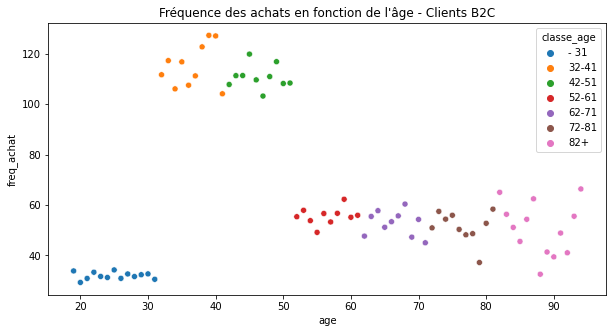

In [36]:
# Graphique : nuage de points,Echantillon du dataset pour alléger le traitement du graphique
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_client_B2C.groupby(['age','classe_age'])['freq_achat'].mean().reset_index().sort_values('classe_age'), x='age', y='freq_achat', hue='classe_age')
plt.title("Fréquence des achats en fonction de l'âge - Clients B2C")
plt.show()

##### Dispersion de la fréquence des achats par classe d'âge : boxplots

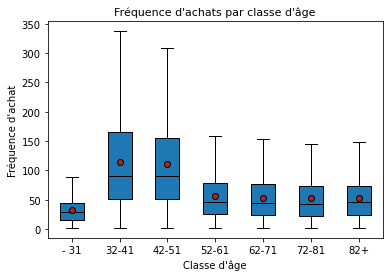

In [37]:
X = "classe_age" # quantitative discrétisée
Y = "freq_achat" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("Fréquence d'achat")
plt.xlabel("Classe d'âge")
plt.title("Fréquence d'achats par classe d'âge",fontsize=11)
plt.show()

#### 4.3.2. Test de normalité de la distribution des variables<a class="anchor" id="4_3_2"></a>

##### Observation de la distribution de la fréquence d'achat vs distribution normale

La distribution de la fréquance d'achat ne suit pas une loi normale.

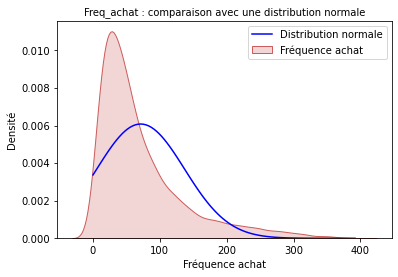

In [38]:
# Graphique distribution normale en densité et diagramme de densité
X=df_client_B2C.freq_achat

x_min = 0.0
x_max = max(X)

mean = X.mean()
std = X.std()

x = np.linspace(x_min, x_max, 100)

y = st.norm.pdf(x,mean,std)

plt.plot(x,y, color='blue',label='Distribution normale')

plt.title('Freq_achat : comparaison avec une distribution normale',fontsize=10)

plt.xlabel('Fréquence achat')
plt.ylabel('Densité')

sns.kdeplot(X, color='indianred',fill=True,label='Fréquence achat')
plt.legend()
plt.show()

##### Tests de normalité

Pour déterminer le test statistique à réaliser, nous allons d'abord tester la normalité de la distribution des variables.

Pour tester la normalité de la distribution, nous utiliserons 2 tests :
- Test de Shapiro-Wilk
- Test du K-squared D'Agostino

Le dataset est trop grand pour le test de Shapiro-Wilk : pour nous assurer du résultat du test, nous effectuons également un test K squared D'Agostino.

Les résultats des tests confirment que la distribution de la variable 'freq_achat' ne suit pas une loi normale.

In [39]:
# Test de Shapiro - Wilk
stat,p = st.shapiro(df_client_B2C["freq_achat"])
print('stat = %.3f , p=%.3f \n'% (stat,p))

alpha = 0.05
if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

stat = 0.817 , p=0.000 

H0 peut être rejettée : la distribution ne suit pas la loi normale.


C:\Users\Adeline\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
# Test K squared D'Agostino
k2, p = st.normaltest(df_client_B2C["freq_achat"])
alpha = 0.05
print("p = ",p)

if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

p =  0.0
H0 peut être rejettée : la distribution ne suit pas la loi normale.


#### 4.3.3. Test statistique : âge et fréquence d'achat<a class="anchor" id="4_3_3"></a>

- **Hypothèses de test**: 
    - H0 : Il n'y a pas de corrélation linéaire entre âge et fréquence des achats
    - H1 : Il y a de corrélation linéaire entre âge et fréquence des achats 
- **Type de variables** : Les variables âge et freq_achat sont des variables quantitatives.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : Pour tester une relation monotone, les tests 
    - Test paramétrique : Coefficient de corrélation de Pearson
        - Conditions d'application du test : Distribution normale des variables
    - Test non paramétrique : Coefficient de corrélation de rang de Spearman 


In [41]:
# Taille de l'échantillon 
df_client_B2C["freq_achat"].shape

(8594,)

Cependant :
Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Notre échantillon est supérieur à 30 : nous pouvons également calculer le coefficient de corrélation de Pearson et comparer le résultat au coefficient de corrélation de rang de Spearman.

##### a. Coefficient de corrélation de Pearson<a class="anchor" id="4_3_3_1"></a>

Le coefficient de corrélation de Pearson est de 0.03 : il n'y a pas de relation linéaire significative entre les variables 'age' et 'freq_achat'.

In [42]:
# Calcul du coefficient de Pearson et de la p-value
coeff, pvalue=st.pearsonr(df_client_B2C["age"],df_client_B2C["freq_achat"])

print("Le coefficient de corrélation de Pearson est égal à :",round(coeff,2))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejetée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de Pearson est égal à : 0.03
p-value =  0.0
H0 est rejetée : il existe une corrélation entre les 2 variables.


##### b. Coefficient de corrélation de rang de Spearman<a class="anchor" id="4_3_3_2"></a>

Le coefficient de corrélation de rang de Spearman est de 0.13 : il n'y a pas de relation monotone significative entre les variables 'age' et 'freq_achat'.

In [43]:
# Calcul du coefficient de corrélation de rang de Spearman
coeff, pvalue = st.spearmanr(df_client_B2C["age"],df_client_B2C["freq_achat"])
print("Le coefficient de corrélation de rang de Spearman est égal à :",round(coeff,2))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejetée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de rang de Spearman est égal à : 0.13
p-value =  0.0
H0 est rejetée : il existe une corrélation entre les 2 variables.


#### 4.3.4. Test statistique : classe d'âge et fréquence des achats<a class="anchor" id="4_3_4"></a>

- **Hypothèses de test**: 
    - H0 : les moyennes des groupes d'âge sont égales
    - H1 : les moyennes des groupes d'âge ne sont pas égales
- **Type de variables** : La variable groupe_age est une variable qualitative et la fréquence des achats est une variable quantitative.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : 
    - Test paramétrique : analyse de la dépendance de la variable quantitative 'freq_achat' au facteur qualitatif 'classe_age', cas d'une ANOVA à un facteur (analyse bivariée).
        - ANOVA classic - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment
            - Egalité des variances des groupes
        - Welch's ANOVA - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment        
    - Test non paramétrique : Kruskal-Wallis
         - Conditions d'application du test : Variables collectées indépendamment


##### Dispersion de la fréquence des achats par groupe d'âge : boxplots

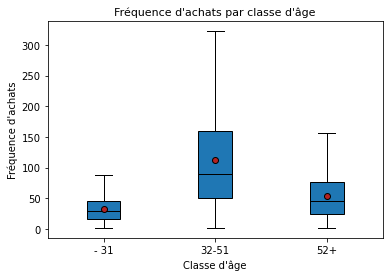

In [44]:
X = "groupe_age" # quantitative discrétisée
Y = "freq_achat" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("Fréquence d'achats")
plt.xlabel("Classe d'âge")
plt.title("Fréquence d'achats par classe d'âge",fontsize=11)
plt.show()

##### a. Test ANOVA paramétrique<a class="anchor" id="4_3_4_1"></a></font>
Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Dans notre cas, n > 30, le test ANOVA paramétrique est applicable.

##### Test d'égalité des variances

Choix du test ANOVA : test de l'égalité des variances

Les variances ne sont pas égales => test Welch-ANOVA applicable.

In [45]:
# Test de l'égalité des variances pour définir quel test d'ANOVA appliqué
pg.homoscedasticity(data=df_client_B2C, dv='freq_achat', group='groupe_age')

,W,pval,equal_var
levene,1116.248763,0.0,False


##### Test Welch-ANOVA

La p-value est < 0.05: les moyennes des groupes ne sont pas égales.

In [46]:
# test Welch-ANOVA
pg.welch_anova(data=df_client_B2C, dv='freq_achat', between='groupe_age')

,Source,ddof1,ddof2,F,p-unc,np2
0,groupe_age,2,5428.603996,1719.747786,0.0,0.274468


##### Test post-hoc Games-Howell

Pour aller plus loin, un test par paires de Games-Howell permet de comparer les moyennes paire par paire.

=> les moyennes des 3 groupes sont bien différentes.

In [47]:
# Test par paires de Games-Howell
pg.pairwise_gameshowell(data=df_client_B2C, dv='freq_achat', between='groupe_age')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,- 31,32-51,32.087820,112.807075,-80.719255,1.445928,-55.825228,4008.649877,0.000000e+00,-1.516942
1,- 31,52+,32.087820,54.126856,-22.039036,0.828492,-26.601375,4752.310479,1.586731e-12,-0.742204
2,32-51,52+,112.807075,54.126856,58.680219,1.548409,37.897117,4965.103911,1.046274e-12,0.954599


##### b. Test de Kruskal-Wallis - non paramétrique<a class="anchor" id="4_3_4_2"></a>

Pour le test de Kruskal-Wallis, la p-value est < 0.05 : il existe une relation entre groupe_age et freq_achat.

In [48]:
# Test de Kruskal-Wallis entre les variables âge et frequence achat.
pg.kruskal(data=df_client_B2C, dv='freq_achat', between='groupe_age')

,Source,ddof1,H,p-unc
Kruskal,groupe_age,2,2466.146258,0.0


#### 4.3.5. Conclusion<a class="anchor" id="4_3_5"></a></font>

- Corrélation :
    - Coefficient de Spearman = 0.13 : les variables ne sont pas indépendantes mais la relation monotone n'est pas significative.
    - Coefficient de Pearson = 0.03 : il n'y a pas de relation linéaire entre les 2 variables.
     
    
- ANOVA : 
    - Les tests Welch ANOVA et Kruskal-Wallis indique qu'il y a un lien entre la classe d'âge et la fréquence des achats.
    - Des comportements différents en fonction de l'âge sont observés pour les groupes :
        - moins de 31 ans
        - 32-51 ans
        - plus de 52 ans

### 4.4. Lien entre l’âge des clients et la taille du panier moyen<a class="anchor" id="4_4"></a>

#### 4.4.1. Représentation graphique<a class="anchor" id="4_4_1"></a>

Il n'y a pas de relation linéaire forte entre la taille du panier moyen et l'âge du client. 


Boxplots - 3 groupes de comportements différents: 
- la tranche d'âge -31
- La tranche d'âge 32-51
- la tranche d'âge 52+

Nous pouvons supposer que l'âge a une influence sur la taille du panier moyen.

##### Nuage de points : taille du panier moyen en fonction de l'âge du client, visualisation des classes d'âges 

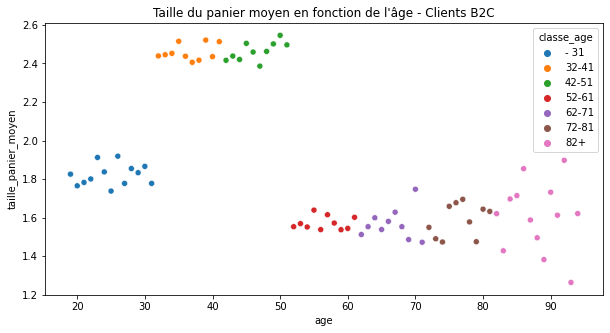

In [49]:
# Graphique : nuage de points, taille du panier moyen par âge
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_client_B2C.groupby(['age','classe_age'])['taille_panier_moyen'].mean().reset_index().sort_values('classe_age')\
                , x='age', y='taille_panier_moyen', hue='classe_age')
plt.title("Taille du panier moyen en fonction de l'âge - Clients B2C")
plt.show()

##### Dispersion du taille du panier moyen par classe d'âge : boxplots

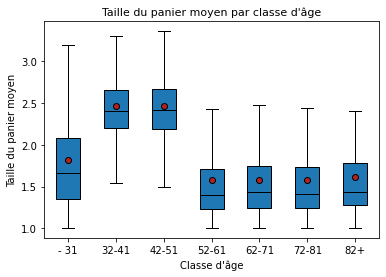

In [50]:
X = "classe_age" # quantitative discrétisée
Y = "taille_panier_moyen" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Taille du panier moyen')
plt.xlabel("Classe d'âge")
plt.title("Taille du panier moyen par classe d'âge",fontsize=11)
plt.show()

#### 4.4.2. Test de normalité de la distribution des variables<a class="anchor" id="4_4_2"></a>

##### Observation de la distribution de la taille du panier moyen vs distribution normale
La distribution de la taille du panier moyenne ne suit pas une loi normale.

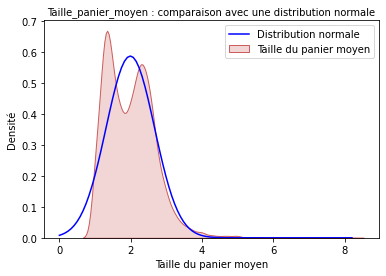

In [51]:
# Graphique distribution normale en densité et diagramme de densité
X=df_client_B2C.taille_panier_moyen

x_min = 0.0
x_max = max(X)

mean = X.mean()
std = X.std()

x = np.linspace(x_min, x_max, 100)

y = st.norm.pdf(x,mean,std)

plt.plot(x,y, color='blue',label='Distribution normale')

plt.title('Taille_panier_moyen : comparaison avec une distribution normale',fontsize=10)

plt.xlabel('Taille du panier moyen')
plt.ylabel('Densité')

sns.kdeplot(X, color='indianred',fill=True,label='Taille du panier moyen')
plt.legend()
plt.show()

##### Tests de normalité

Pour déterminer le test statistique à réaliser, nous allons d'abord tester la normalité de la distribution des variables.

Pour tester la normalité de la distribution, nous utiliserons 2 tests :
- Test de Shapiro-Wilk
- Test du K-squared D'Agostino

Le dataset est trop grand pour le test de Shapiro-Wilk : pour nous assurer du résultat du test, nous effectuons également un test K squared D'Agostino.

La distribution de la variable 'taille_panier_moyen' ne suit pas une loi normale.

In [52]:
# Test de Shapiro - Wilk
stat,p = st.shapiro(df_client_B2C["taille_panier_moyen"])
print('stat = %.3f , p=%.3f \n'% (stat,p))

alpha = 0.05
if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

stat = 0.939 , p=0.000 

H0 peut être rejettée : la distribution ne suit pas la loi normale.


C:\Users\Adeline\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
# Test K squared D'Agostino
k2, p = st.normaltest(df_client_B2C["taille_panier_moyen"])
alpha = 0.05
print("p = ",p)

if p < alpha:  # H0 : la variable suit la loi normale de distribution
    print("H0 peut être rejettée : la distribution ne suit pas la loi normale.")
else:
    print("H0 est acceptée : la distribution suit la loi normale")

p =  0.0
H0 peut être rejettée : la distribution ne suit pas la loi normale.


#### 4.4.3. Test statistique : âge et taille du panier moyen<a class="anchor" id="4_4_3"></a>

- **Hypothèses de test**: 
    - H0 : Il n'y a pas de corrélation linéaire entre âge et taille du panier moyen
    - H1 : Il y a de corrélation linéaire entre âge et taille du panier moyen
- **Type de variables** : Les variables âge et taille du panier moyen sont des variables quantitatives.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : Pour tester une relation monotone, les tests 
    - Test paramétrique : Coefficient de corrélation de Pearson
        - Conditions d'application du test : Distribution normale des variables
    - Test non paramétrique : Coefficient de corrélation de rang de Spearman 


In [54]:
# Taille de l'échantillon 
df_client_B2C["taille_panier_moyen"].shape

(8594,)

Cependant :
Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Notre échantillon est supérieur à 30 : nous pouvons également calculer le coefficient de corrélation de Pearson et comparer le résultat au coefficient de corrélation de rang de Spearman.

##### a. Coefficient de corrélation de Pearson<a class="anchor" id="4_3_3_1"></a>

Avec un coefficient de corrélation de Pearson de -0.20, nous pouvons dire qu'il y a une très faible corrélation linéaire négative, mais non significative.

In [55]:
# Calcul du coefficient de Pearson et de la p-value
coeff, pvalue=st.pearsonr(df_client_B2C["age"],df_client_B2C["taille_panier_moyen"])

print("Le coefficient de corrélation de Pearson est égal à :",round(coeff,2))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejettée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de Pearson est égal à : -0.21
p-value =  0.0
H0 est rejettée : il existe une corrélation entre les 2 variables.


##### b. Coefficient de corrélation de rang de Spearman<a class="anchor" id="4_4_3_2"></a>

Avec un coefficient de corrélation de rang de Spearman de -0.20, nous pouvons dire qu'il y a une très faible relation monotone négative, mais qu'elle n'est pas significative.

In [56]:
# Calcul du coefficient de corrélation de rang de Spearman
coeff, pvalue = st.spearmanr(df_client_B2C["age"],df_client_B2C["taille_panier_moyen"])
print("Le coefficient de corrélation de rang de Spearman est égal à :",round(coeff,2))
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : pas de corrélation entre les 2 variables
    print("H0 est rejettée : il existe une corrélation entre les 2 variables.")
else:
    print("H0 est acceptée : il n'existe pas de corrélation entre les 2 variables.")

Le coefficient de corrélation de rang de Spearman est égal à : -0.2
p-value =  0.0
H0 est rejettée : il existe une corrélation entre les 2 variables.


#### 4.4.4. Test statistique : classe d'âge et taille du panier moyen<a class="anchor" id="4_4_4"></a>

- **Hypothèses de test**: 
    - H0 : les moyennes des groupes d'âge sont égales
    - H1 : les moyennes des groupes d'âge ne sont pas égales
- **Type de variables** : La variable groupe_age est une variable qualitative et la taille du panier moyen est une variable quantitative.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : 
    - Test paramétrique : analyse de la dépendance de la variable quantitative 'taille_panier_moyen' au facteur qualitatif 'classe_age', cas d'une ANOVA à un facteur (analyse bivariée).
        - ANOVA classic - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment
            - Egalité des variances des groupes
        - Welch's ANOVA - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment        
    - Test non paramétrique : Kruskal-Wallis
         - Conditions d'application du test : Variables collectées indépendamment

##### Dispersion de la taille du panier moyen par groupe d'âge : boxplots

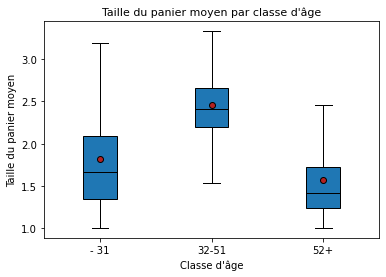

In [57]:
X = "groupe_age" # quantitative discrétisée
Y = "taille_panier_moyen" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Taille du panier moyen')
plt.xlabel("Classe d'âge")
plt.title("Taille du panier moyen par classe d'âge",fontsize=11)
plt.show()

##### a. Test ANOVA paramétrique<a class="anchor" id="4_4_4_1"></a>
Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Dans notre cas, n > 30, le test ANOVA paramétrique est applicable.

##### Test d'égalité des variances

Choix du test d'ANOVA applicable : test de l'égalité des variances

Les variances ne sont pas égales =>  test Welch-ANOVA.

In [58]:
# Test de l'égalité des variances pour définir quel test d'ANOVA appliqué
pg.homoscedasticity(data=df_client_B2C, dv='taille_panier_moyen', group='groupe_age')

,W,pval,equal_var
levene,113.940227,1.449763e-49,False


##### Test Welch-ANOVA

La p-value est < 0.05 : les moyennes des groupes ne sont pas égales.

In [59]:
# test Welch-ANOVA
pg.welch_anova(data=df_client_B2C, dv='taille_panier_moyen', between='groupe_age')

,Source,ddof1,ddof2,F,p-unc,np2
0,groupe_age,2,4957.677202,2629.595606,0.0,0.33298


##### Test post-hoc Games-Howell

Un test par paires de Games-Howell permet de comparer les moyennes paire par paire.

Les moyennes des 3 groupes sont bien différentes.

In [60]:
# Test par paires de Games-Howell
pg.pairwise_gameshowell(data=df_client_B2C, dv='taille_panier_moyen', between='groupe_age')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,- 31,32-51,1.821891,2.460451,-0.638561,0.016515,-38.666475,3585.448207,6.880052e-13,-1.050686
1,- 31,52+,1.821891,1.576106,0.245785,0.017547,14.007166,4159.855557,6.479262e-13,0.390814
2,32-51,52+,2.460451,1.576106,0.884346,0.012618,70.085858,5851.733180,0.000000e+00,1.765408


##### b. Test de Kruskal-Wallis - non paramétrique<a class="anchor" id="4_4_4_2"></a>

La p-value du test de Kruskal-Wallis est < 0.05 : il y a un lien entre groupe d'âge et la taille du panier moyen.

In [61]:
# Test de Kruskal-Wallis entre les variables âge et taille_panier_moyen 
pg.kruskal(data=df_client_B2C, dv='taille_panier_moyen', between='groupe_age')

,Source,ddof1,H,p-unc
Kruskal,groupe_age,2,3653.336896,0.0


#### 4.4.5. Conclusion<a class="anchor" id="4_4_5"></a></font>

- Corrélation :
    - Coefficient de Spearman = -0.20 : les variables ne sont pas indépendantes mais la relation monotone n'est pas significative.
    - Coefficient de Pearson = -0.20 : idem résultat précédent. 

    
- ANOVA : 
    - Les tests Welch ANOVA et Kruskal-Wallis indique qu'il y a un lien entre le groupe d'âge et la taille du panier moyen.
    - Des comportements différents en fonction de l'âge sont observés pour les groupes :
        - moins de 31 ans
        - 32-51 ans
        - plus de 52 ans

### 4.5. Lien entre l’âge des clients et les catégories des livres achetés<a class="anchor" id="4_5"></a>

#### 4.5.1. Représentation graphique<a class="anchor" id="4_5_1"></a>

Nous observons sur le graphique que :
- les 19-30 ans achètent plus de catégorie 2 et 1
- les 30-50 ans achètent plus de catégorie 0 et 1
- les 50-70 ans achètent plus de catégorie 1 et 0

Il y a un lien entre l'âge des clients et les catégories de livres achetés.


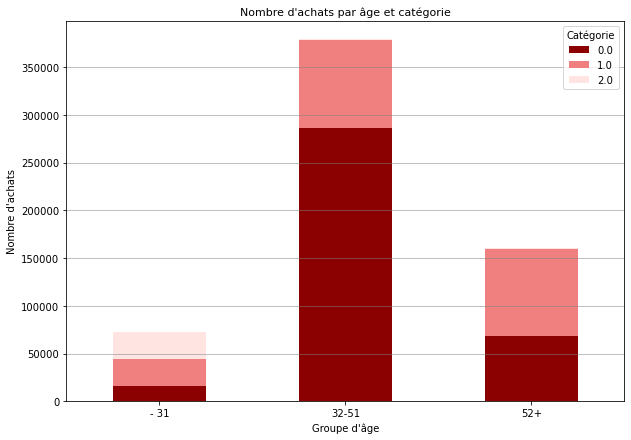

In [62]:
# Diagramme à barres empilées : pour plus de lisibilité, le graphique a été représenté par tranches d'âge et non par âge.
df_B2C.pivot_table(index='groupe_age', columns='categ',values='date', aggfunc='count')\
         .plot.bar(stacked=True,color=['darkred', 'lightcoral', 'mistyrose'],rot=0, figsize=(10,7))
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre d'achats")
plt.grid(color='gray', linestyle='-', linewidth=0.5, axis='y')
plt.legend(title='Catégorie',loc='upper right')
plt.title("Nombre d'achats par âge et catégorie",fontsize=11)
plt.show()

##### Dispersion classe d'âge par catégorie : boxplots

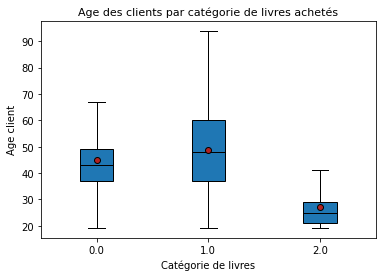

In [63]:
X = "categ" # qualitative
Y = "age" # quantitative

modalites = df_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_B2C[df_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Age client')
plt.xlabel("Catégorie de livres")
plt.title("Age des clients par catégorie de livres achetés",fontsize=11)
plt.show()

#### 4.5.2. Test statistique : âge et catégorie <a class="anchor" id="4_5_2"></a>

- **Hypothèses de test**: 
    - H0 : les moyennes des catégories sont égales
    - H1 : les moyennes des catégories ne sont pas égales
- **Type de variables** : La variable categorie est une variable qualitative et l'âge est une variable quantitative.
- **Risque d'erreur de première espèce $\alpha$** : 5% soit 0.05
- **Choix du test statistique** : 
    - Test paramétrique : analyse de la dépendance de la variable quantitative 'age' au facteur qualitatif 'categ', cas d'une ANOVA à un facteur (analyse bivariée).
        - ANOVA classic - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment
            - Egalité des variances des groupes
        - Welch's ANOVA - Conditions d'application du test : 
            - Distribution normale des variables
            - Variables collectées indépendamment        
    - Test non paramétrique : Kruskal-Wallis
         - Conditions d'application du test : Variables collectées indépendamment

La distribution de la variable 'age' a été testée [ici](#4_2_2) : elle ne suit pas la loi normale. 

##### a. Test ANOVA paramétrique<a class="anchor" id="4_5_2_1"></a>

Rappel du théorème central limite : la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grande ( n > 30). 

Dans notre cas, n > 30, le test ANOVA paramétrique est applicable.

##### Test d'égalité des variances
Choix du test d'ANOVA applicable : test d'égalité des variances

Les variances ne sont pas égales => test Welch-ANOVA.

In [64]:
# Test de l'égalité des variances pour définir quel test d'ANOVA appliqué
pg.homoscedasticity(data=df_B2C, dv='age', group='categ')

,W,pval,equal_var
levene,23352.540268,0.0,False


##### Test Welch-ANOVA

La p-value est inférieure à 0,05 : les moyennes des groupes ne sont pas égales.

In [65]:
# test Welch-ANOVA
pg.welch_anova(data=df_B2C, dv='age', between='categ')

,Source,ddof1,ddof2,F,p-unc,np2
0,categ,2,89810.093654,57663.795913,0.0,0.113132


##### Test post-hoc Games-Howell

Un test par paires de Games-Howell permet de comparer les moyennes paire par paire.

Les moyennes des 3 groupes sont bien différentes.

In [66]:
# Test par paires de Games-Howell
pg.pairwise_gameshowell(data=df_B2C, dv='age', between='categ')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0.0,1.0,44.799700,48.802379,-4.002679,0.039265,-101.940764,340049.022017,0.000000e+00,-0.278179
1,0.0,2.0,44.799700,26.960824,17.838875,0.058656,304.125624,39554.846875,0.000000e+00,1.777728
2,1.0,2.0,48.802379,26.960824,21.841554,0.065310,334.430045,59540.670777,6.208478e-12,2.012437


##### b. Test de Kruskal-Wallis non paramétrique<a class="anchor" id="4_5_2_2"></a>

In [67]:
# Création des groupes de valeurs à tester : un par catégorie de livres
cat_0=df_B2C.loc[df_B2C['categ']==0.0,'age']
cat_1=df_B2C.loc[df_B2C['categ']==1.0,'age']
cat_2=df_B2C.loc[df_B2C['categ']==2.0,'age']

# Utilisation de la méthode Kruskal de Scipy.stats
stat,pvalue=st.kruskal(cat_0,cat_1,cat_2)
print("H =",stat)
alpha = 0.05
print("p-value = ",p)

if p < alpha:  # H0 : la médiane est la même pour tous les groupes
    print("H0 est rejettée : la médiane n'est pas la même pour tous les groupes.")
else:
    print("H0 est acceptée : la médiane est la même pour tous les groupes.")

H = 69911.21351199699
p-value =  0.0
H0 est rejettée : la médiane n'est pas la même pour tous les groupes.


#### 4.5.3. Test statistique d'indépendance du $\chi^2$ : classe d'âge et catégorie  <a class="anchor" id="4_5_3"></a>

- **Hypothèses de test**: 
    - H0 : La catégorie de livres achetés est indépendante du groupe d'âge du client.
    - H1 : La catégorie de livres achetés est dépendante du groupe d'âge du client..
- **Type de variables** : Les variables groupe_age et catégorie sont des variables qualitatives.
- **Risque d'erreur de première espèce $\alpha$** : 5%, soit 0.05
- **Choix du test statistique** : Test d'indépendance du chi-2
    - Les conditions pour appliquer un test du chi-2 sont :
        - 2 variables qualitatives, collectées de manière indépendantes
        - aucune valeur attendue n'est égale à 0
        - pour 80% des combinaisons des 2 variables, les valeurs observées et attendues sont supérieures à 5.

##### Tableau des contingences

In [68]:
# Tableau des contingences
X = "categ"
Y = "groupe_age"

cont_age = df_B2C[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_age

groupe_age,- 31,32-51,52+,Total
categ,,,,
0.0,15920,285920,68229,370069
1.0,27879,92133,90765,210777
2.0,28912,1430,1438,31780
Total,72711,379483,160432,612626


##### Heatmap de la matrice des écarts au carré normalisés

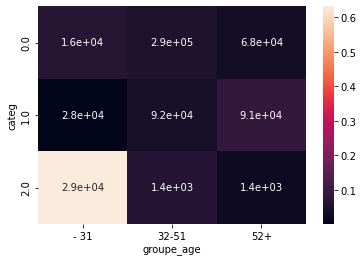

In [69]:
# Calcul des écarts au carré normalisés
tx = cont_age.loc[:,["Total"]]
ty = cont_age.loc[["Total"],:]
n = len(df_B2C)
indep = tx.dot(ty) / n

c = cont_age.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

# Affichage des résultats sous forme de heatmap
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

##### Test du $\chi^2$ d'indépendance

Vérifications des conditions d'application du test du $\chi^2$ d'indépendance:
- les variables ont été collectées de manière indépendantes 
- Aucune valeur attendue = 0
- Les valeurs observées et attendues sont supérieures à 5 

In [70]:
# test du chi-2 et V de Cramer avec researchpy 
crosstab, test_results, expected = rp.crosstab(df_B2C["categ"], df_B2C["groupe_age"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [71]:
# Valeurs attendues
print("Les valeurs attendues sont :\n",expected)

Les valeurs attendues sont :
               groupe_age                             
groupe_age          - 31          32-51           52+
categ                                                
0.0         43922.535216  229234.303355  96912.161430
1.0         25016.578544  130562.999760  55197.421696
2.0          3771.886241   19685.696885   8322.416874


Résultats :
- La p-value est égale à 0, inférieure à 0.05 : l'hypothèse H0 peut être rejetée.
- Le V de Cramer est égal à 0.46 sur une échelle allant de [0;1]

Il existe un lien fort entre la catégorie de livres et l'âge des clients. 

In [72]:
# Résultats : Chi-2, p-value et V de Cramer
test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,265103.9306
1,p-value =,0.0000
2,Cramer's V =,0.4652


#### 4.5.4. Conclusion <a class="anchor" id="4_5_4"></a>

- ANOVA : 
    - Le test Welch-ANOVA et le test de Kruskal-Wallis indiquent qu'il y a un lien entre l'âge et la catégorie de livres achetés.
- Test d'indépendance du $\chi^2$ : 
    - Le test d'indépendance du $\chi^2$ indique également qu'il existe un lien entre les groupes d'âge et la catégorie de livres achetés. Notamment que la catégorie 2 est achetée par les moins de 31 ans.

### 4.6 Observations des corrélations entre les variables quantitatives <a class="anchor" id="4_6"></a>

#### 4.6.1 Corrélation des variables quantitatives<a class="anchor" id="4_6_1"></a>

In [73]:
# Data frame contenant les variables quantitatives
data_quanti=df_client_B2C[['montant_total_achat','age','panier_moyen','taille_panier_moyen','freq_achat']]

Le montant_total_achat est corrélé à la freq_achat par une relation linéaire positive, corrélation forte
- coefficient de rang de Spearman = 0.83 et coefficient de Pearson = 0.84

Le panier moyen est corrélé à l'âge par une relation linéaire négative
- coefficient de rang de Spearman = -0.7 et coefficient de Pearson = -0.61

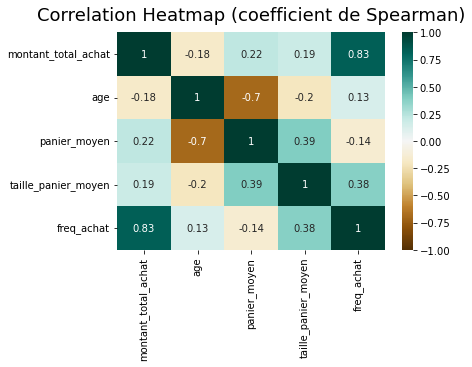

In [74]:
# Calcul du coeffiecient de corrélation de rang de Spearman et représentation sous forme de heatmap
heatmap = sns.heatmap(data_quanti.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap (coefficient de Spearman)', fontdict={'fontsize':18}, pad=12)
plt.show()

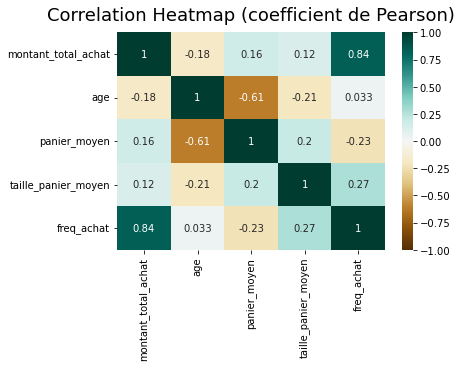

In [75]:
# Calcul du coeffiecient de corrélation de Pearson et représentation sous forme de heatmap
heatmap = sns.heatmap(data_quanti.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap (coefficient de Pearson)', fontdict={'fontsize':18}, pad=12)
plt.show()

#### 4.6.2. Modélisation de la relation 'montant_total_achat' et 'freq_achat'<a class="anchor" id="4_6_2"></a>

2 relations différentes en fonction de la classe d'âge :
- les moins de 32 ans
- les 32 ans et plus

Nous allons modéliser ces relations avec des régressions linéaires, par la méthode des moindres carrés ordinaires.

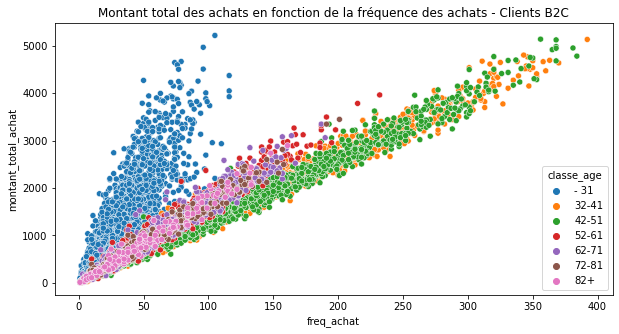

In [76]:
# Graphique : nuage de points
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_client_B2C.sort_values('classe_age'), x='freq_achat', y='montant_total_achat',hue='classe_age')
plt.title("Montant total des achats en fonction de la fréquence des achats - Clients B2C")
plt.show()

##### Clients moins de 32 ans

In [77]:
df_reg1=df_client_B2C.loc[df_client_B2C.age<31,['freq_achat','montant_total_achat','classe_age','age']]

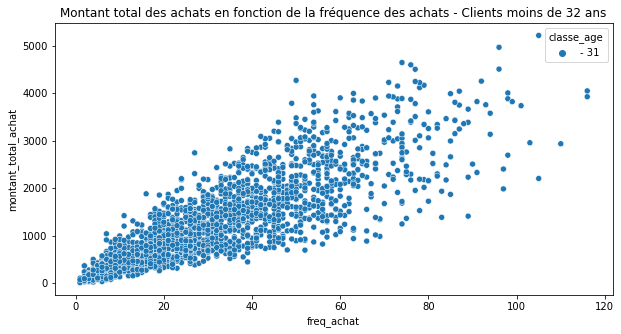

In [78]:
# Graphique : nuage de points - clients < 32 ans
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_reg1.sort_values('classe_age'), x='freq_achat', y='montant_total_achat',hue='classe_age')
plt.title("Montant total des achats en fonction de la fréquence des achats - Clients moins de 32 ans")
plt.show()

In [79]:
# Création de l'échantillon d'entraînement et de l'échantillon de test en respectant la répartition globale
train_1 = df_reg1.groupby('age').apply(lambda x: x.sample(frac=0.80)).droplevel(0)
index=train_1.reset_index().iloc[:,0].tolist()
test_1 = df_reg1.loc[~df_reg1.index.isin(index)]

In [80]:
# Regression linéaire par la méthode des moindres carrés ordinaires
import statsmodels.api as sm
Y = train_1['montant_total_achat']
X = train_1[['freq_achat']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b,rsquared1 = result.params['freq_achat'],result.params['intercept'],result.rsquared

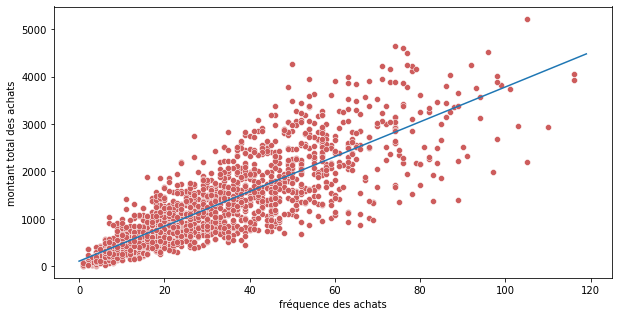

In [81]:
# Représentation de la régression linéaire
plt.figure(figsize=(10,5))
sns.scatterplot(data=train_1, x='freq_achat', y='montant_total_achat',color='indianred')
plt.plot(np.arange(120),[a*x+b for x in np.arange(120)])
plt.xlabel("fréquence des achats")
plt.ylabel("montant total des achats")
plt.show()

In [82]:
# calcul de l'erreur
train_1['estim']=a*train_1.freq_achat+b
train_1['erreur']=train_1.estim-train_1.montant_total_achat

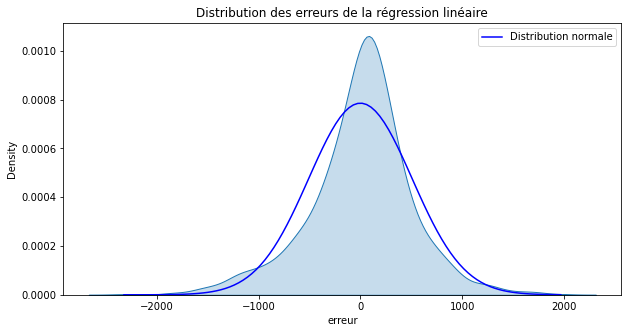

In [83]:
# Distribution des erreurs (résidus)
plt.figure(figsize=(10,5))
sns.kdeplot(data=train_1,x='erreur',fill=True)
plt.title('Distribution des erreurs de la régression linéaire')

# courve loi normale
X=train_1.erreur
x_min = min (X)
x_max = max(X)
mean = X.mean()
std = X.std()
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)
plt.plot(x,y, color='blue',label='Distribution normale')

plt.legend()
plt.show()

- **Qualité du modèle : coefficient de détermination R²**

70% de la variabilité des points est expliquée par le modèle. 

In [84]:
# Coefficient R2 pour le modèle de régression avec l'échantillon d'entraînement
print("Echantillon d'entraînement : Le coefficient de détermination R² de la régression linéaire de", round(rsquared1,2))

Echantillon d'entraînement : Le coefficient de détermination R² de la régression linéaire de 0.69


In [85]:
# calcul de la valeur estimée avec l'échantillon de test
test_1.loc[:,'estim']=a*test_1.freq_achat+b

C:\Users\Adeline\AppData\Local\Temp\ipykernel_1076\689772500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.loc[:,'estim']=a*test_1.freq_achat+b


In [86]:
# Calcul du coefficient de détermination R²
from sklearn.metrics import r2_score 
R_square = r2_score(test_1.montant_total_achat, test_1.estim) 
print("Echantillon de test : Le coefficient de détermination R² de la régression linéaire de", round(R_square,2))

Echantillon de test : Le coefficient de détermination R² de la régression linéaire de 0.71


##### Clients de 32 ans et plus

In [87]:
df_reg2=df_client_B2C.loc[df_client_B2C.age>=32,['freq_achat','montant_total_achat','classe_age','age']]

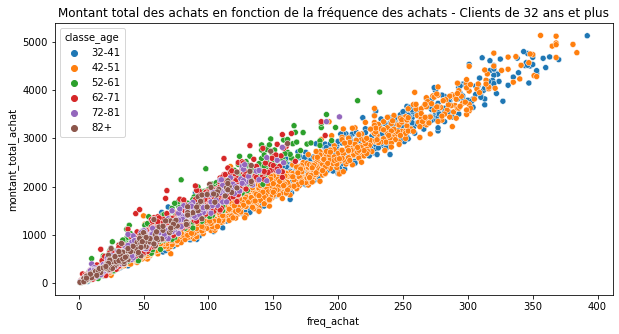

In [88]:
# Graphique : nuage de points - clients >=32 ans
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_reg2.sort_values('classe_age'), x='freq_achat', y='montant_total_achat',hue='classe_age')
plt.title("Montant total des achats en fonction de la fréquence des achats - Clients de 32 ans et plus")
plt.show()

In [89]:
# Création de l'échantillon d'entraînement et de l'échantillon de test en respectant la répartition globale
train_2 = df_reg2.groupby('age').apply(lambda x: x.sample(frac=0.80)).droplevel(0)
index=train_2.reset_index().iloc[:,0].tolist()
test_2 = df_reg2.loc[~df_reg2.index.isin(index)]

In [90]:
# Regression linéaire par la méthode des moindres carrés ordinaires
import statsmodels.api as sm
Y = train_2['montant_total_achat']
X = train_2[['freq_achat']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
c,d,rsquared2 = result.params['freq_achat'],result.params['intercept'],result.rsquared

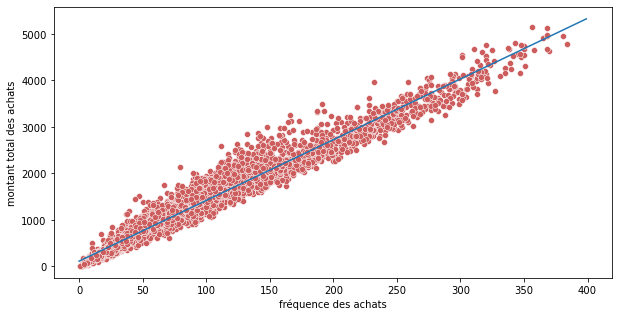

In [91]:
# Représentation de la régression linéaire
plt.figure(figsize=(10,5))
sns.scatterplot(data=train_2, x='freq_achat', y='montant_total_achat',color='indianred')
plt.plot(np.arange(400),[c*x+d for x in np.arange(400)])
plt.xlabel("fréquence des achats")
plt.ylabel("montant total des achats")
plt.show()

In [92]:
# calcul de l'erreur
train_2['estim']=c*train_2.freq_achat+d
train_2['erreur']=train_2.estim-train_2.montant_total_achat

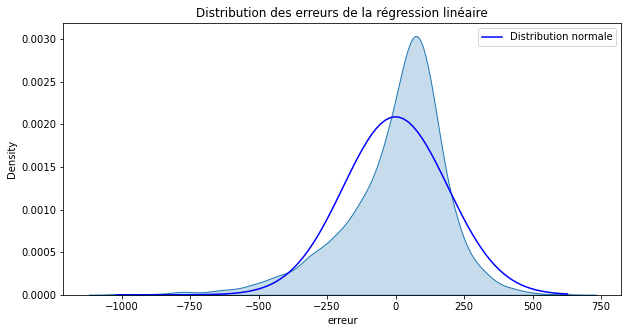

In [93]:
# Distribution des erreurs (résidus)
plt.figure(figsize=(10,5))
sns.kdeplot(data=train_2,x='erreur',fill=True)
plt.title('Distribution des erreurs de la régression linéaire')

# courve loi normale
X=train_2.erreur
x_min = min (X)
x_max = max(X)
mean = X.mean()
std = X.std()
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)
plt.plot(x,y, color='blue',label='Distribution normale')

plt.legend()
plt.show()

- **Qualité du modèle : coefficient de détermination R²**

96% de la variabilité des points peut être expliquée par le modèle : le modèle est performant.

In [94]:
# Coefficient R2 pour le modèle de régression avec l'échantillon d'entraînement
print("Echantillon d'entraînement : Le coefficient de détermination R² de la régression linéaire de", round(rsquared2,2))

Echantillon d'entraînement : Le coefficient de détermination R² de la régression linéaire de 0.96


In [95]:
# calcul de la valeur estimée avec l'échantillon de test
test_2.loc[:,'estim']=c*test_2.freq_achat+d

C:\Users\Adeline\AppData\Local\Temp\ipykernel_1076\576185904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2.loc[:,'estim']=c*test_2.freq_achat+d


In [96]:
# Calcul du coefficient de détermination R² pour 'l'échantillon de test
R_square = r2_score(test_2.montant_total_achat, test_2.estim) 
print('Echantillon de test : Le coefficient de détermination R² de la régression linéaire de', round(R_square,2))

Echantillon de test : Le coefficient de détermination R² de la régression linéaire de 0.95


##### Représentation des modèles

In [97]:
# 2 groupes d'age
df_client_B2C.loc[df_client_B2C.age<32,'groupe_age'] = '< 32 ans'
df_client_B2C.loc[df_client_B2C.age>=32,'groupe_age'] = '>= 32 ans'

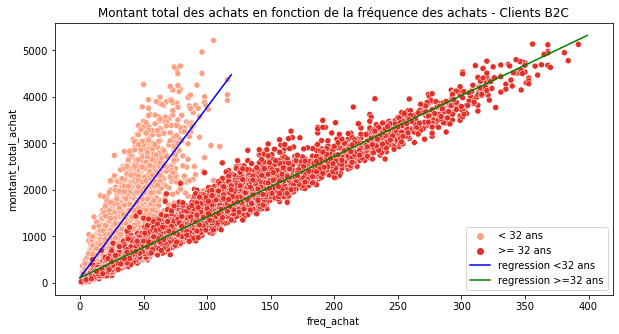

In [98]:
# Graphique : nuage de points
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_client_B2C.sort_values('groupe_age'), x='freq_achat', y='montant_total_achat',\
                hue='groupe_age',palette='Reds')
plt.title("Montant total des achats en fonction de la fréquence des achats - Clients B2C")

# regression linéaire age < 32 ans
plt.plot(np.arange(120),[a*x+b for x in np.arange(120)],label='regression <32 ans',color='blue')
# regression linéaire age >= 32 ans
plt.plot(np.arange(400),[c*x+d for x in np.arange(400)],label='regression >=32 ans',color='green')

plt.legend()

plt.show()

#### 4.6.3. Modélisation de la relation 'age' et 'panier_moyen'<a class="anchor" id="4_6_3"></a>

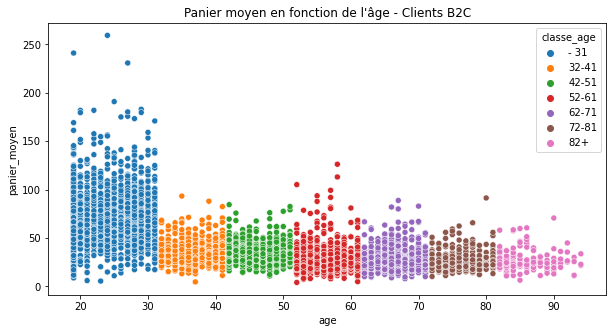

In [99]:
# Graphique : nuage de points
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_client_B2C.sort_values('classe_age'), x='age', y='panier_moyen',hue='classe_age')
plt.title("Panier moyen en fonction de l'âge - Clients B2C")
plt.show()

##### Dispersion du panier moyen par classe d'âge : boxplots

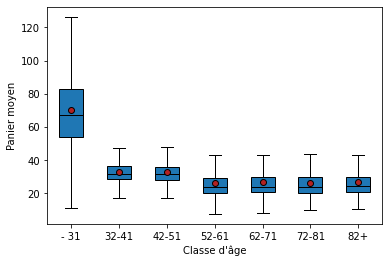

In [100]:
X = "classe_age" # quantitative discrétisée
Y = "panier_moyen" # quantitative

modalites = df_client_B2C.sort_values(X) # tri des classes d'age
modalites = modalites[X].unique() # modalités de la variable classe_age
groupes = [] # Création de groupes

# pour chaque modalité, ajouter les valeurs de la variable 'montant_total_achat'
for m in modalites:
    groupes.append(df_client_B2C[df_client_B2C[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Panier moyen')
plt.xlabel("Classe d'âge")
plt.show()

In [101]:
df_reg3=df_client_B2C[['age','panier_moyen']]

In [102]:
# Création de l'échantillon d'entraînement et de l'échantillon de test en respectant la répartition globale
train_3 = df_reg3.groupby('age').apply(lambda x: x.sample(frac=0.80)).droplevel(0)
index=train_3.reset_index().iloc[:,0].tolist()
test_3 = df_reg3.loc[~df_reg3.index.isin(index)]

In [103]:
# Regression linéaire par la méthode des moindres carrés ordinaires
import statsmodels.api as sm
Y = train_3['panier_moyen']
X = train_3[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
e,f,rsquared3 = result.params['age'],result.params['intercept'],result.rsquared

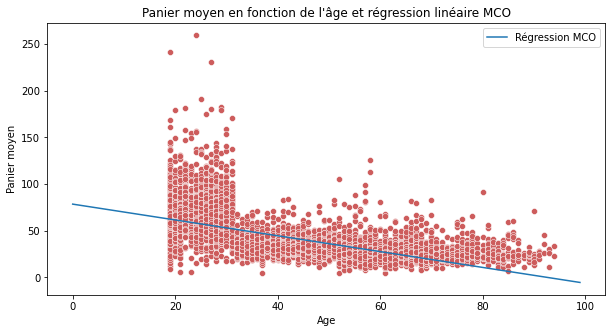

In [104]:
# Représentation de la régression linéaire
plt.figure(figsize=(10,5))
sns.scatterplot(data=train_3, x='age', y='panier_moyen',color='indianred')
plt.plot(np.arange(100),[e*x+f for x in np.arange(100)],label='Régression MCO')
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.title("Panier moyen en fonction de l'âge et régression linéaire MCO")
plt.legend()
plt.show()

In [105]:
# calcul de l'erreur
train_3['estim']=e*train_3.age+f
train_3['erreur']=train_3.estim-train_3.panier_moyen

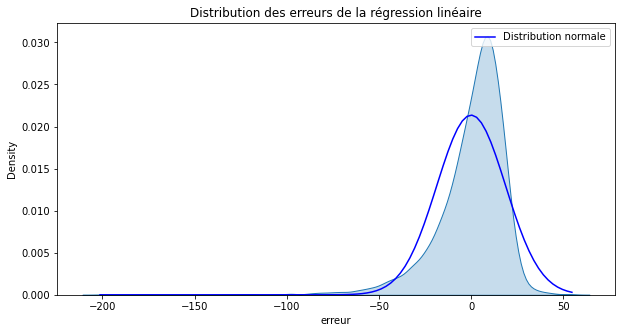

In [106]:
# Distribution des erreurs (résidus)
plt.figure(figsize=(10,5))
sns.kdeplot(data=train_3,x='erreur',fill=True)
plt.title('Distribution des erreurs de la régression linéaire')

# courve loi normale
X=train_3.erreur
x_min = min (X)
x_max = max(X)
mean = X.mean()
std = X.std()
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x,mean,std)
plt.plot(x,y, color='blue',label='Distribution normale')

plt.legend()
plt.show()

- **Qualité du modèle : coefficient de détermination R²**

37% de la variabilité des points peut être expliquée par le modèle : le modèle n'est pas performant.

In [107]:
# Coefficient R2 pour le modèle de régression avec l'échantillon d'entraînement
print("Echantillon d'entraînement : Le coefficient de détermination R² de la régression linéaire de", round(rsquared3,2))

Echantillon d'entraînement : Le coefficient de détermination R² de la régression linéaire de 0.37


In [108]:
# calcul de la valeur estimée avec l'échantillon de test
test_3.loc[:,'estim']=e*test_3.age+f

C:\Users\Adeline\AppData\Local\Temp\ipykernel_1076\798472192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_3.loc[:,'estim']=e*test_3.age+f


In [109]:
# Calcul du coefficient de détermination R² pour 'l'échantillon de test
R_square = r2_score(test_3.panier_moyen, test_3.estim) 
print('Echantillon de test : Le coefficient de détermination R² de la régression linéaire de', round(R_square,2))

Echantillon de test : Le coefficient de détermination R² de la régression linéaire de 0.38
